# Regression - G3.2

## 1. Dataset Analysis
Load datasets via the scikit-learn library. The datasets can be downloaded using the fetch_openml function by indicating the name of the dataset as a parameter. In addition, organise the downloaded data in a pandas DataFrame, and display the first rows to gain an overview of the available variables.

In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load dataset using fetch_openml
meta = fetch_openml(name='meta', version=1, parser='auto')
california_housing = fetch_openml(name='california_housing', version=7, parser='auto')
kin8nm = fetch_openml(name='kin8nm', version=1, parser='auto')
chscase_census2 = fetch_openml(name='chscase_census2', version=1, parser='auto')

### 1.1 Meta
Source Link: https://openml.org/search?type=data&status=active&id=566

In [2]:
# We extract data, labels and feature names from the META Dataset
data_meta = meta.data
target_meta = meta.target
feature_names_meta = meta.feature_names
description_meta = meta.DESCR

# Now you can use data, labels and dataset information as needed
print("Dati:")
print(data_meta)
print("\nLabel:")
print(target_meta)
print("\nNomi delle feature:")
print(feature_names_meta)
print("\nDescrizione del dataset:")
print(description_meta)

# DataFrame creation with Pandas
df_meta = pd.DataFrame(data_meta, columns=feature_names_meta)
df_meta['target'] = target_meta
print(df_meta.head())

Dati:
         DS_Name    T    N   p  k  Bin  Cost  SDratio  correl  cancor1  ...  \
0    Aust_Credit  690  690  14  2    4     0   1.2623  0.1024   0.7713  ...   
1    Aust_Credit  690  690  14  2    4     0   1.2623  0.1024   0.7713  ...   
2    Aust_Credit  690  690  14  2    4     0   1.2623  0.1024   0.7713  ...   
3    Aust_Credit  690  690  14  2    4     0   1.2623  0.1024   0.7713  ...   
4    Aust_Credit  690  690  14  2    4     0   1.2623  0.1024   0.7713  ...   
..           ...  ...  ...  .. ..  ...   ...      ...     ...      ...  ...   
523      Vehicle  846  846  18  4    0     0   1.5392  0.4828   0.8420  ...   
524      Vehicle  846  846  18  4    0     0   1.5392  0.4828   0.8420  ...   
525      Vehicle  846  846  18  4    0     0   1.5392  0.4828   0.8420  ...   
526      Vehicle  846  846  18  4    0     0   1.5392  0.4828   0.8420  ...   
527      Vehicle  846  846  18  4    0     0   1.5392  0.4828   0.8420  ...   

     fract1  fract2  skewness  kurtosis      

### 1.2 California_Housing 
Source Link: https://openml.org/search?type=data&status=active&id=44977&sort=runs

In [3]:
# We extract data, labels and feature names from the CALIFORNIA HOUSING Dataset
data_ch = california_housing.data
target_ch = california_housing.target
feature_names_ch = california_housing.feature_names
description_ch = california_housing.DESCR

# Now you can use data, labels and dataset information as needed
print("Dati:")
print(data_ch)
print("\nLabel:")
print(target_ch)
print("\nNomi delle feature:")
print(feature_names_ch)
print("\nDescrizione del dataset:")
print(description_ch)

# DataFrame creation with Pandas
df_ch = pd.DataFrame(data_ch, columns=feature_names_ch)
df_ch['target'] = target_ch
print(df_ch.head())

Dati:
       longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0        -122.23     37.88                41         880            129   
1        -122.22     37.86                21        7099           1106   
2        -122.24     37.85                52        1467            190   
3        -122.25     37.85                52        1274            235   
4        -122.25     37.85                52        1627            280   
...          ...       ...               ...         ...            ...   
20635    -121.09     39.48                25        1665            374   
20636    -121.21     39.49                18         697            150   
20637    -121.22     39.43                17        2254            485   
20638    -121.32     39.43                18        1860            409   
20639    -121.24     39.37                16        2785            616   

       population  households  medianIncome  
0             322         126        8.3252  
1

### 1.3 Kin8nm
Source Link: https://openml.org/search?type=data&id=189&sort=runs&status=active

In [4]:
# We extract data, labels and feature names from the KIN8NM Dataset
data_kin8nm = kin8nm.data
target_kin8nm = kin8nm.target
feature_names_kin8nm = kin8nm.feature_names
description_kin8nm = kin8nm.DESCR

# Now you can use data, labels and dataset information as needed
print("Dati:")
print(data_kin8nm)
print("\nLabel:")
print(target_kin8nm)
print("\nNomi delle feature:")
print(feature_names_kin8nm)
print("\nDescrizione del dataset:")
print(description_kin8nm)

# DataFrame creation with Pandas
df_kin8nm = pd.DataFrame(data_kin8nm, columns=feature_names_kin8nm)
df_kin8nm['target'] = target_kin8nm
print(df_kin8nm.head())

Dati:
        theta1    theta2    theta3    theta4    theta5    theta6    theta7  \
0    -0.015119  0.360741  0.469398  1.309675  0.988024 -0.025493  0.664071   
1     0.360478 -0.301395  0.629183 -1.440146 -0.741637 -1.196749 -1.038444   
2     1.563238 -1.294753  0.078987  1.432937  1.149136 -1.292140  1.562988   
3     0.199485  0.901157 -1.356304 -0.080525 -0.976628  0.829894 -0.855649   
4     0.659737  0.120552 -0.008756  0.648839  0.626832 -0.646539  1.318074   
...        ...       ...       ...       ...       ...       ...       ...   
8187  1.459523 -0.201551 -0.610721  1.424181  0.269273  1.172781 -0.509818   
8188  0.654980 -0.823516 -0.809246  0.408441 -1.368838  0.582222 -1.394697   
8189  0.103862  1.024329 -1.047221  0.280905 -0.181155 -0.651934 -1.241842   
8190 -1.109311 -0.027690 -1.448736 -0.648566 -0.462142  0.814971  1.100615   
8191  1.155010 -0.429331 -1.567260  0.883077 -1.203777 -0.126506  0.331042   

        theta8  
0     0.062763  
1    -0.717461  
2    -

### 1.4 Cshcase_Census2
Source Link: https://openml.org/search?type=data&id=673&sort=runs&status=active

In [5]:
# We extract data, labels and feature names from the CHSCASE_CENSUS2 Dataset
data_chcc2 = chscase_census2.data
target_chcc2 = chscase_census2.target
feature_names_chcc2 = chscase_census2.feature_names
description_chcc2 = chscase_census2.DESCR

# Now you can use data, labels and dataset information as needed
print("Dati:")
print(data_chcc2)
print("\nLabel:")
print(target_chcc2)
print("\nNomi delle feature:")
print(feature_names_chcc2)
print("\nDescrizione del dataset:")
print(description_chcc2)

# DataFrame creation with Pandas
df_chcc2 = pd.DataFrame(data_chcc2, columns=feature_names_chcc2)
df_chcc2['target'] = target_chcc2
print(df_chcc2.head())

Dati:
      col_1    col_2    col_3    col_4    col_5    col_6    col_7
0    16.754  21.7430  16.0140  19.5413  17.5730  20.0110  19.3907
1    17.419  15.2250  12.5705  25.0069  20.4635  18.7705  19.4249
2    42.063  15.7570  30.8815  16.1605  20.8111  19.0999  19.5469
3    15.907  24.8285  16.0473  15.4880  23.9404  19.7499  18.7775
4    35.787  20.1530  21.5765  21.0381  20.6379  20.7242  18.6020
..      ...      ...      ...      ...      ...      ...      ...
395  13.232  21.6985  17.8110  15.5863  22.8264  18.3119  20.1592
396  15.632  17.8920  23.2730  21.8106  17.0332  19.9000  18.8605
397  45.271  18.7130  24.6893  14.7660  20.0488  20.6509  19.6883
398   9.431  32.3505  13.5570  17.7773  20.5473  18.7909  20.2040
399  10.631  12.2660  19.2515  20.7928  18.5736  20.6123  18.6656

[400 rows x 7 columns]

Label:
0      19.2227
1      19.7238
2      20.5771
3      20.2231
4      20.4897
        ...   
395    19.8959
396    20.3573
397    19.9983
398    20.2885
399    20.6079
Name:

## 2. Preprocessing

### 2.1 Meta

In [7]:
# Delete nominal features (if any)
df_meta = df_meta.select_dtypes(exclude=['category'])

# Explore dataset for missing values
missing_values_meta = df_meta.isnull().sum()
print("\n\nMissing Values:")
print(missing_values_meta)

# We interpolate the missing data
df_meta = df_meta.interpolate(method='cubicspline', limit_direction='both', axis=0)

# We standardising the values within the Dataset
numeric_cols_meta = df_meta.select_dtypes(include=['float64', 'int64']).columns
df_meta[numeric_cols_meta] = StandardScaler().fit_transform(df_meta[numeric_cols_meta])

print("\n\nDataFrame after interpolation and standardisation:")
print(df_meta)



Missing Values:
T           0
N           0
p           0
k           0
Bin         0
Cost        0
SDratio     0
correl      0
cancor1     0
cancor2     0
fract1      0
fract2      0
skewness    0
kurtosis    0
Hc          0
Hx          0
MCx         0
EnAtr       0
NSRatio     0
target      0
dtype: int64


DataFrame after interpolation and standardisation:
            T         N         p         k       Bin     Cost   SDratio  \
0   -0.696059 -0.705657 -0.431747 -0.408597  0.090122 -0.39736 -0.337108   
1   -0.696059 -0.705657 -0.431747 -0.408597  0.090122 -0.39736 -0.337108   
2   -0.696059 -0.705657 -0.431747 -0.408597  0.090122 -0.39736 -0.337108   
3   -0.696059 -0.705657 -0.431747 -0.408597  0.090122 -0.39736 -0.337108   
4   -0.696059 -0.705657 -0.431747 -0.408597  0.090122 -0.39736 -0.337108   
..        ...       ...       ...       ...       ...      ...       ...   
523 -0.668066 -0.694697 -0.320654 -0.302843 -0.350473 -0.39736  0.093442   
524 -0.668066 -0.694697 -0.3

### 2.2 California_Housing

In [9]:
# Delete nominal features (if any)
df_ch = df_ch.select_dtypes(exclude=['object'])

# Explore dataset for missing values
missing_values_ch = df_ch.isnull().sum()
print("Missing Values:")
print(missing_values_ch)

# We standardising the values within the Dataset
numeric_cols_ch = df_ch.select_dtypes(include=['float64', 'int64']).columns
df_ch[numeric_cols_ch] = StandardScaler().fit_transform(df_ch[numeric_cols_ch])

print("\n\nDataFrame after interpolation and standardisation:")
print(df_ch)

Missing Values:
longitude           0
latitude            0
housingMedianAge    0
totalRooms          0
totalBedrooms       0
population          0
households          0
medianIncome        0
target              0
dtype: int64


ValueError: Length of values (20640) does not match length of index (528)

### 2.3 Kin8nm

In [10]:
# Delete nominal features (if any)
df_kin8nm = df_kin8nm.select_dtypes(exclude=['object'])

# Explore dataset for missing values
missing_values_kin8nm = df_kin8nm.isnull().sum()
print("Missing Values:")
print(missing_values_kin8nm)

# We standardising the values within the Dataset
numeric_cols_kin8nm = df_kin8nm.select_dtypes(include=['float64', 'int64']).columns
df_kin8nm[numeric_cols_kin8nm] = StandardScaler().fit_transform(df_kin8nm[numeric_cols_kin8nm])

print("\n\nDataFrame after interpolation and standardisation:")
print(df_kin8nm)

Missing Values:
theta1    0
theta2    0
theta3    0
theta4    0
theta5    0
theta6    0
theta7    0
theta8    0
target    0
dtype: int64


ValueError: Length of values (8192) does not match length of index (528)

### 2.4 Cshcase_Census2

In [11]:
# Delete nominal features (if any)
df_chcc2 = df_chcc2.select_dtypes(exclude=['object'])

# Explore dataset for missing values
missing_values_chcc2 = df_chcc2.isnull().sum()
print("Missing Values:")
print(missing_values_chcc2)

# We standardising the values within the Dataset
numeric_cols_chcc2 = df_chcc2.select_dtypes(include=['float64', 'int64']).columns
df_meta[numeric_cols_chcc2] = StandardScaler().fit_transform(df_chcc2[numeric_cols_chcc2])

print("\n\nDataFrame after interpolation and standardisation:")
print(df_chcc2)

Missing Values:
col_1     0
col_2     0
col_3     0
col_4     0
col_5     0
col_6     0
col_7     0
target    0
dtype: int64


ValueError: Length of values (400) does not match length of index (528)

## 3. Regression

Results for Linear Regression:
MAE: 8.157090045352976e-13
RMSE: 1.0020343970442824e-12
MAPE: inf%
SMAPE: 3.7735849056803454%

Results for SVR:
MAE: 47.549848449393195
RMSE: 152.798031525703
MAPE: inf%
SMAPE: 83.72004256256538%

Results for Decision Tree:
MAE: 1.118660377358491
RMSE: 7.620745424837963
MAPE: 3.5670097041967876%
SMAPE: 3.0930213150179027%

Results for Random Forest:
MAE: 3.715686792452811
RMSE: 22.708354634030314
MAPE: inf%
SMAPE: 3.875297888636871%

Results for Gradient Boosting:
MAE: 3.8563124987817416
RMSE: 35.73977839201082
MAPE: inf%
SMAPE: 8.638038045694431%



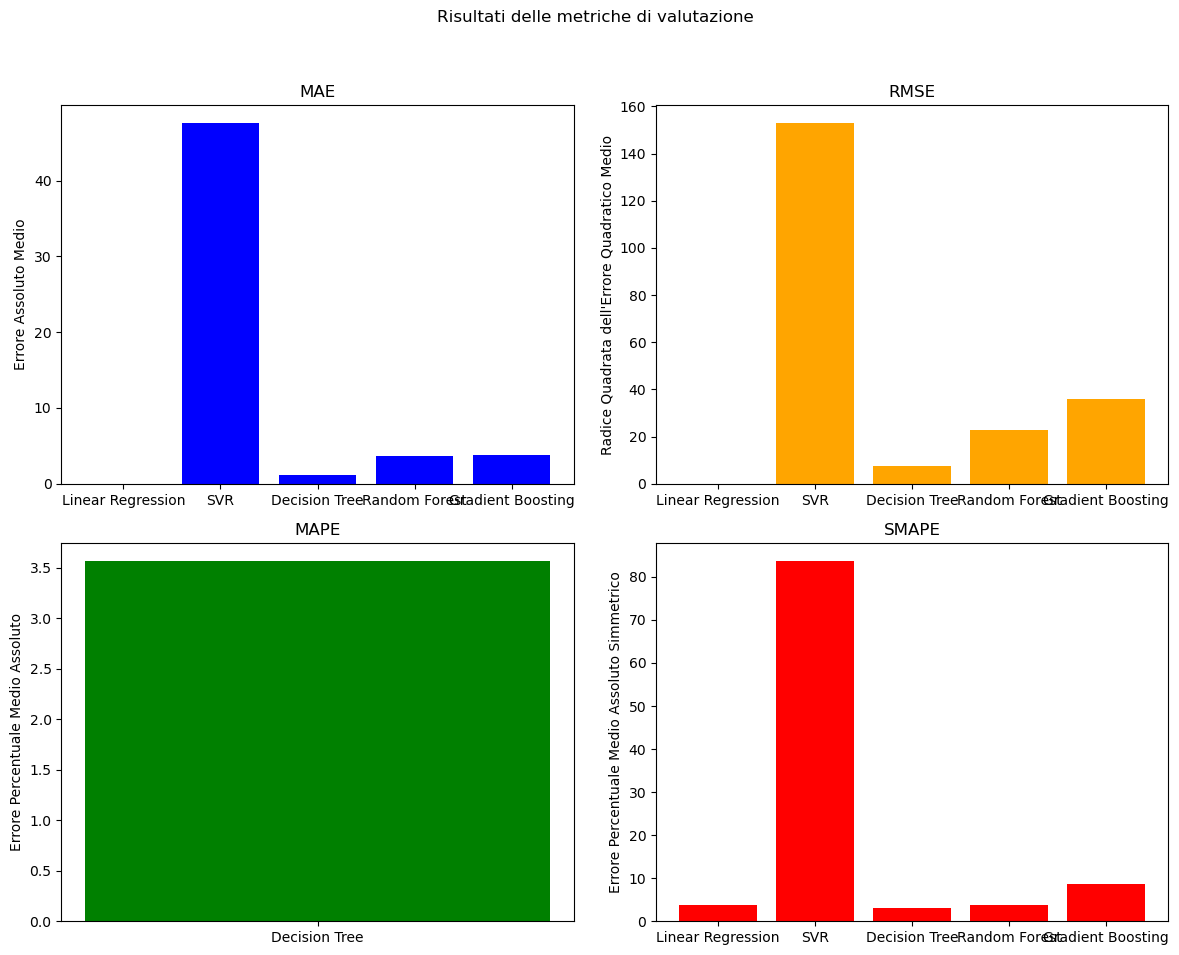

In [12]:
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    smape_score = smape(y_test, y_pred)

    print(f"Results for {model_name}:")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape}%")
    print(f"SMAPE: {smape_score}%\n")

    return mae, rmse, mape, smape_score

# Caricare i tuoi dati
# df è il DataFrame principale con le features e il target
# label è la Serie contenente il target
# Assumendo che il DataFrame sia chiamato df e la colonna target 'class'
# Nota: Seleziona solo le colonne necessarie per l'addestramento, escludendo eventuali colonne non utili o duplicati
features = df_meta.select_dtypes(exclude=['category'])
target = target_meta

# Divisione del DataFrame in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Inizializzare i modelli
linear_reg_model = LinearRegression()
svr_model = SVR()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
gradient_boosting_model = GradientBoostingRegressor()

# Valutare i modelli
models = [linear_reg_model, svr_model, decision_tree_model, random_forest_model, gradient_boosting_model]
model_names = ['Linear Regression', 'SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

mae_scores = []
rmse_scores = []
mape_scores = []
smape_scores = []

for model, model_name in zip(models, model_names):
    mae, rmse, mape, smape_score = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    mape_scores.append(mape)
    smape_scores.append(smape_score)

# Plot dei risultati
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Risultati delle metriche di valutazione')

# MAE
axs[0, 0].bar(model_names, mae_scores, color='blue')
axs[0, 0].set_title('MAE')
axs[0, 0].set_ylabel('Errore Assoluto Medio')

# RMSE
axs[0, 1].bar(model_names, rmse_scores, color='orange')
axs[0, 1].set_title('RMSE')
axs[0, 1].set_ylabel('Radice Quadrata dell\'Errore Quadratico Medio')

# MAPE
axs[1, 0].bar(model_names, mape_scores, color='green')
axs[1, 0].set_title('MAPE')
axs[1, 0].set_ylabel('Errore Percentuale Medio Assoluto')

# SMAPE
axs[1, 1].bar(model_names, smape_scores, color='red')
axs[1, 1].set_title('SMAPE')
axs[1, 1].set_ylabel('Errore Percentuale Medio Assoluto Simmetrico')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()